<a href="https://colab.research.google.com/github/FadlilaAfida/PCVK_Ganjil_2023/blob/main/Tugas_Akhir_Indetifikas_Jeruk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# import library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt.data
from google.colab.patches import cv2_imshow

In [35]:
# Menyiapkan direktori kerja
import os

# Masukkan path dataset di bawah ini
path = "/content/drive/MyDrive/PCVK_Gambar/DatasetTugasAkhir/dataset orange"

os.chdir(path)
os.getcwd()

# Read gambar

train_dir = os.path.join(path, 'Train')
test_dir = os.path.join(path, 'Test')

# Directory training fresh orange pictures
train_fresh_dir = os.path.join(train_dir, 'freshOranges')

# Directory training rotten orange pictures
train_rotten_dir = os.path.join(train_dir, 'rottenOranges')

# Directory testing fresh orange pictures
test_fresh_dir = os.path.join(test_dir, 'freshOranges')

# Directory testing rotten orange pictures
test_rotten_dir = os.path.join(test_dir, 'rottenOranges')

In [36]:
# Cek nama file

train_fresh_fnames = os.listdir(train_fresh_dir)
print("Nama file fresh orange training:")
print(train_fresh_fnames[:15])

train_rotten_fnames = os.listdir(train_rotten_dir)
print("\nNama file rotten orange training:")
print(train_rotten_fnames[:15])


Nama file fresh orange training:
['rotated_by_15_Screen Shot 2018-06-12 at 11.50.19 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.50.54 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.50.33 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.50.28 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.51.47 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.52.03 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.50.14 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.56.48 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.56.35 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.56.20 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.58.02 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.54.44 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.55.23 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.55.28 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 11.55.48 PM.png']

Nama file rotten orange training:
['rotated_by_15_Screen Shot 2018-06-12 at 11.2

In [37]:
# Menghitung banyak file input

print('\nTotal training fresh orange images:', len(train_fresh_fnames))
print('Total training rotten orange images:', len(train_rotten_fnames))
print('Total testing fresh orange images:', len(os.listdir(test_fresh_dir)))
print('Total testing rotten orange images:', len(os.listdir(test_rotten_dir)))


Total training fresh orange images: 1466
Total training rotten orange images: 1605
Total testing fresh orange images: 388
Total testing rotten orange images: 403


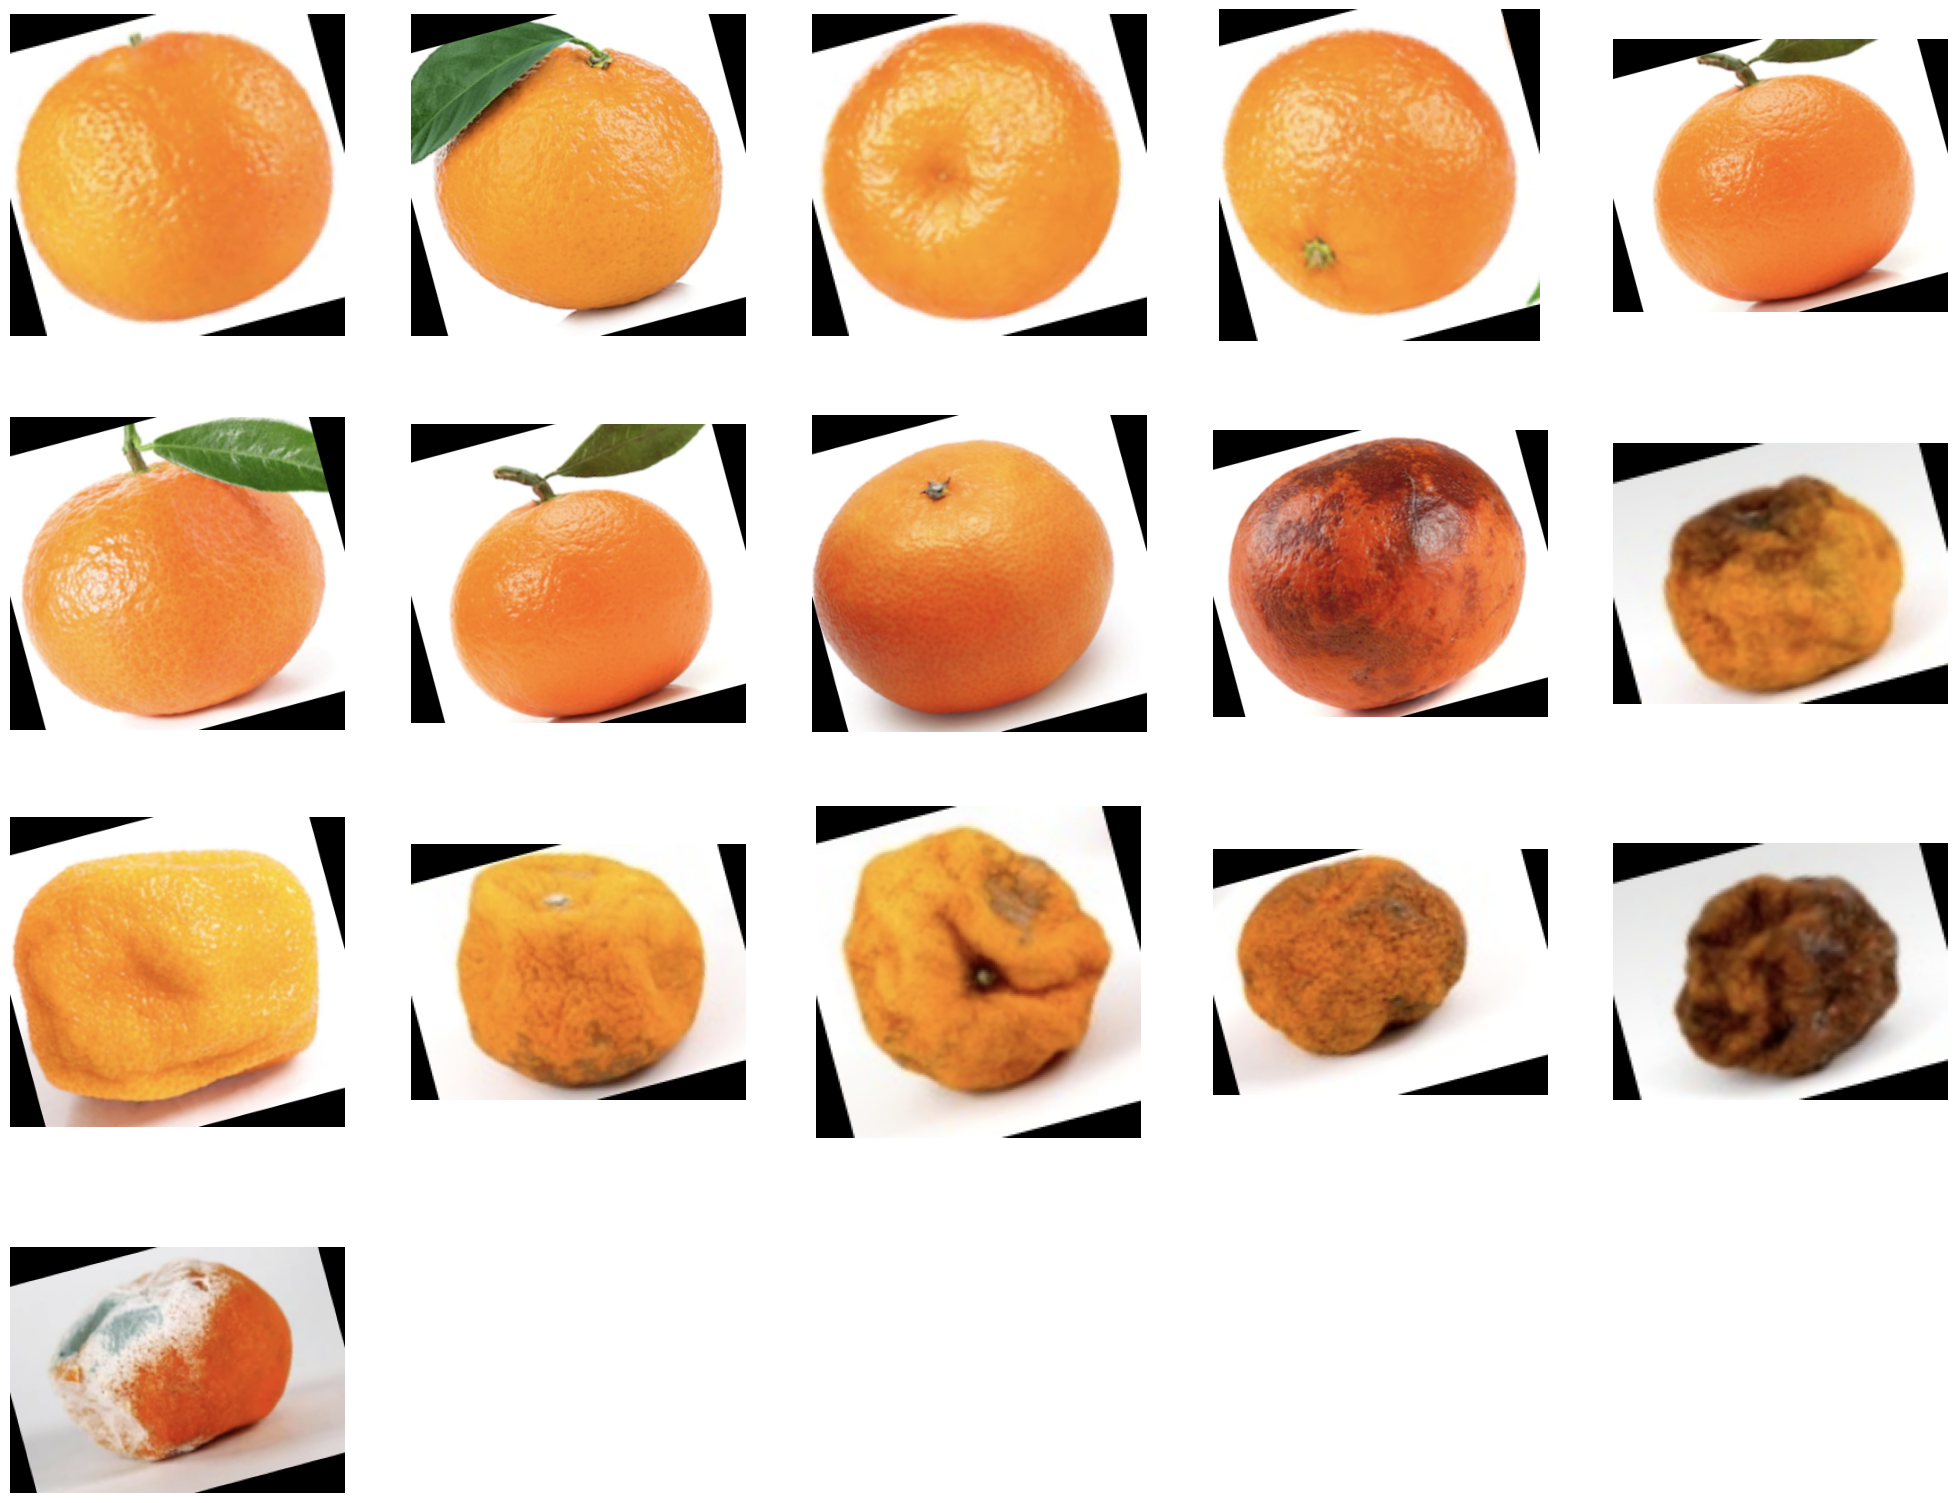

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Menampilkan sampel jeruk matang dan jeruk belum matang
nrows = 5
ncols = 5

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 8
next_orange_fresh_pix = [os.path.join(train_fresh_dir, fname)
                for fname in train_fresh_fnames[pic_index-8:pic_index]]
next_orange_rotten_pix = [os.path.join(train_rotten_dir, fname)
                for fname in train_rotten_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_orange_fresh_pix + next_orange_rotten_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [39]:
from tensorflow.keras import layers
from tensorflow.keras import Model


# Input berdimensi 150x150px dengan 3 channel untuk Blue, Green, dan Red
img_input = layers.Input(shape=(150, 150, 3))

# Convolution layer I: 16 filter berukuran 3x3
x = layers.Conv2D(16, 3, activation='relu')(img_input)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Convolution layer II: 32 filter berukuran 3x3
x = layers.Conv2D(32, 3, activation='relu')(x)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Convolution layer III: 64 filter berukuran 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

# Menggabungkan layer input dan output
model = Model(img_input, output)

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 3071 images belonging to 2 classes.
Found 791 images belonging to 2 classes.


In [41]:
from tensorflow.keras.optimizers import Adam

# ...

# Membuat model
model = Model(img_input, output)

# Kompilasi model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# ...

# Model fitting
history = model.fit(
    train_generator,
    steps_per_epoch=5,  # Jumlah total batch dalam satu epoch (5 kategori x 1 batch/kategori)
    epochs=15,
    validation_data=validation_generator,
    validation_steps=5,  # Jumlah total batch dalam validasi (5 kategori x 1 batch/kategori)
    verbose=2
)


Epoch 1/15
5/5 - 132s - loss: 1.3157 - accuracy: 0.4938 - val_loss: 0.7697 - val_accuracy: 0.4625 - 132s/epoch - 26s/step
Epoch 2/15
5/5 - 106s - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6641 - val_accuracy: 0.5437 - 106s/epoch - 21s/step
Epoch 3/15
5/5 - 109s - loss: 0.6542 - accuracy: 0.5875 - val_loss: 0.5955 - val_accuracy: 0.7063 - 109s/epoch - 22s/step
Epoch 4/15
5/5 - 78s - loss: 0.5782 - accuracy: 0.7375 - val_loss: 0.5346 - val_accuracy: 0.8125 - 78s/epoch - 16s/step
Epoch 5/15
5/5 - 72s - loss: 0.4359 - accuracy: 0.8750 - val_loss: 0.4261 - val_accuracy: 0.8188 - 72s/epoch - 14s/step
Epoch 6/15
5/5 - 67s - loss: 0.3548 - accuracy: 0.8500 - val_loss: 0.3901 - val_accuracy: 0.8687 - 67s/epoch - 13s/step
Epoch 7/15
5/5 - 42s - loss: 0.4389 - accuracy: 0.8375 - val_loss: 0.3597 - val_accuracy: 0.8500 - 42s/epoch - 8s/step
Epoch 8/15
5/5 - 43s - loss: 0.4286 - accuracy: 0.8062 - val_loss: 0.3487 - val_accuracy: 0.8438 - 43s/epoch - 9s/step
Epoch 9/15
5/5 - 29s - loss: 0.4215 

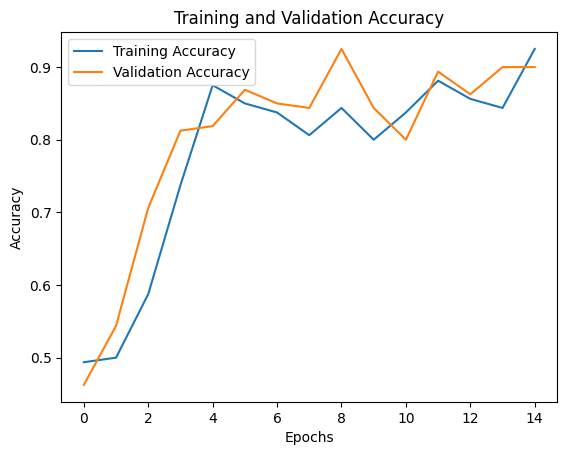

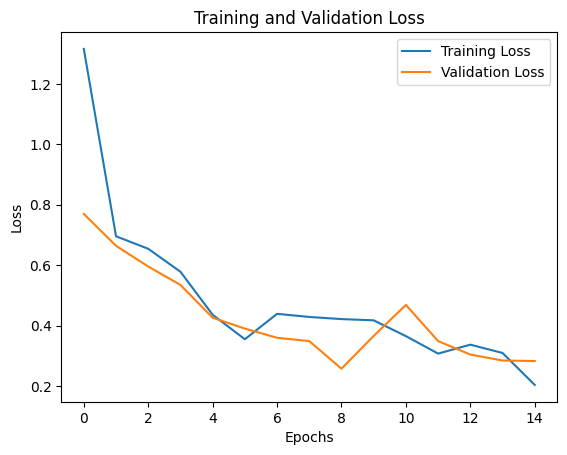

In [42]:
# VISUALISASI AKURASI PREDIKSI

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [45]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Mendefinisikan model untuk visualisasi
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Memilih 1 sampel random dari setiap kategori
fresh_img_files = [os.path.join(train_fresh_dir, f) for f in os.listdir(train_fresh_dir)]
rot_img_files = [os.path.join(train_rot_dir, f) for f in os.listdir(train_rotten_dir)]

# Gabungkan file dari kedua kategori
all_img_files = fresh_img_files + rot_img_files

# Pilih satu file secara acak
img_path = random.choice(all_img_files)
print(img_path)

# Memuat gambar dan memprosesnya untuk visualisasi
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Rescale 1/255
x /= 255

# Memasukkan gambar ke dalam model
successive_feature_maps = visualization_model.predict(x)

# Visualisasi fitur untuk setiap layer
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()


NameError: ignored

In [44]:
# TESTING
from keras.preprocessing import image
import numpy as np

img_path=('/content/drive/MyDrive/PCVK_Gambar/DatasetTugasAkhir/dataset_orange/Train/freshOrange/freshOrange (1).jpg')
img=image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds=model.predict(x)
print(preds)

FileNotFoundError: ignored